The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

**Load Dataset**

In [3]:
# import some data to play with
iris = datasets.load_iris()
data_df=pd.DataFrame(iris.data,columns=iris.feature_names)
data_df["Target"]=list(iris.target)
data_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


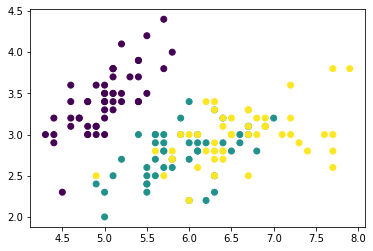

In [27]:
plt.scatter(data_df["sepal length (cm)"],data_df["sepal width (cm)"],c=iris.target)
#plt.scatter(data_df["petal length (cm)"],data_df["petal width (cm)"],c=iris.target)

**Split Dataset -> Train & Test = 70% & 30%**

In [22]:
 X_train, X_test, y_train, y_test = train_test_split(data_df.iloc[:,0:2],data_df["Target"] , test_size=0.33, random_state=123)
X_train.shape,X_test.shape, y_train.shape, y_test.shape 

((100, 2), (50, 2), (100,), (50,))

Accuarcy = -> 0.78 %


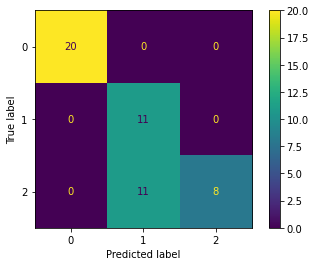

In [23]:
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)
pred_svm=clf_svm.predict(X_test)
print("Accuarcy = ->",clf_svm.score(X_test,y_test),"%")
plot_confusion_matrix(clf_svm, X_test, y_test)  
plt.show() 

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


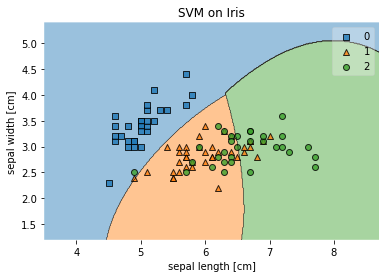

In [25]:
# Plotting decision regions
plot_decision_regions(np.asarray(X_train),np.asarray(y_train), clf=clf_svm,filler_feature_values=4)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.title('SVM on Iris')
plt.show()